<a href="https://colab.research.google.com/github/skytecat/FraudDetection/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [27]:
# Подсчет пропусков в каждом столбце
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [28]:
data['Amount'].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


In [5]:
data.duplicated().sum() #Check for duplicates

np.int64(1081)

In [6]:
data.drop_duplicates(inplace=True) #Take away those duplicates
data.shape

(283726, 31)

In [31]:
#Check if the classes are unbalanced
print(pd.Series(data["Class"]).value_counts(normalize=True))

Class
0    0.998333
1    0.001667
Name: proportion, dtype: float64


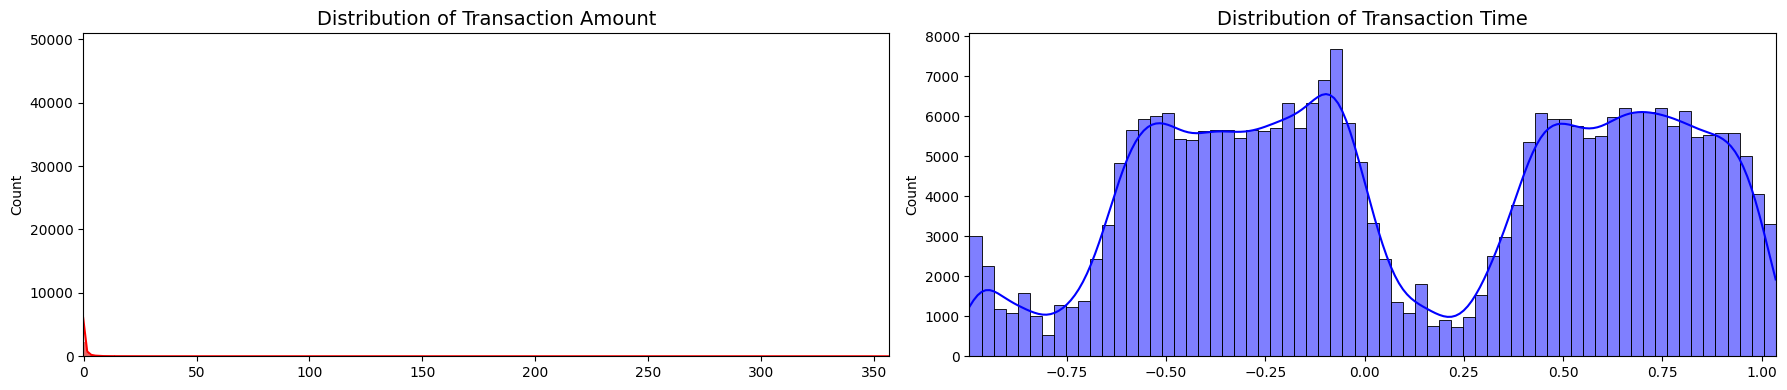

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание подграфиков
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Данные
amount_val = data['Amount'].values
time_val = data['Time'].values

sns.histplot(amount_val, ax=ax[0], color='r', kde=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

# График для распределения времени транзакций (Time)
sns.histplot(time_val, ax=ax[1], color='b', kde=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

# Отображение графиков
plt.tight_layout()
plt.show()

In [7]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

data['Amount'] = rob_scaler.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time'] = rob_scaler.fit_transform(data['Time'].values.reshape(-1,1))

data[['Time', 'Amount']].head()

,Time,Amount
0,-0.995290,1.774718
1,-0.995290,-0.268530
2,-0.995279,4.959811
3,-0.995279,1.411487
4,-0.995267,0.667362


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold


X = data.drop(['Class'],axis=1)
y = data['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels

print(original_Xtest.shape)

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values


# # See if both the train and test label distribution are similarly distributed
# train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
# test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
# print('-' * 100)

# print('Label Distributions: \n')
# print(train_counts_label/ len(original_ytrain))
# print(test_counts_label/ len(original_ytest))

Train: [ 30191  30261  30275 ... 283723 283724 283725] Test: [    0     1     2 ... 56805 56806 56807]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 30191  30261  30275 ... 113535 113536 113537]
Train: [     0      1      2 ... 283723 283724 283725] Test: [ 77084  77379  79220 ... 170292 170293 170294]
Train: [     0      1      2 ... 283723 283724 283725] Test: [149302 150027 150068 ... 226999 227000 227001]
Train: [     0      1      2 ... 226999 227000 227001] Test: [212341 212365 213905 ... 283723 283724 283725]
(56745, 30)


In [74]:
# Lets shuffle the data before creating the subsamples
data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42).reset_index(drop=True)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.661363,1.847674,-0.805517,-0.635034,-0.159486,-0.049455,1.421396,-1.051262,0.597636,1.471352,...,0.262774,1.009795,0.135377,-1.619183,-0.373566,0.240156,0.051839,-0.069976,-0.056320,0
1,0.898561,-3.387601,3.977881,-6.978585,1.657766,-1.100500,-3.599487,-3.686651,1.942252,-3.065089,...,1.043587,0.262189,-0.479224,-0.326638,-0.156939,0.113807,0.354124,0.287592,-0.300654,1
2,-0.511186,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,-0.284800,1
3,-0.227215,1.193916,-0.571085,0.742522,-0.014588,-0.624561,0.832162,-0.833350,0.272897,1.169425,...,-0.049502,0.207265,-0.265272,-0.679294,0.511812,1.246604,-0.028671,-0.006112,0.137811,1
4,-0.528403,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,...,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,10.496871,1


In [56]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

Distribution of the Classes in the subsample dataset
Class
0    0.509845
1    0.490155
Name: count, dtype: float64


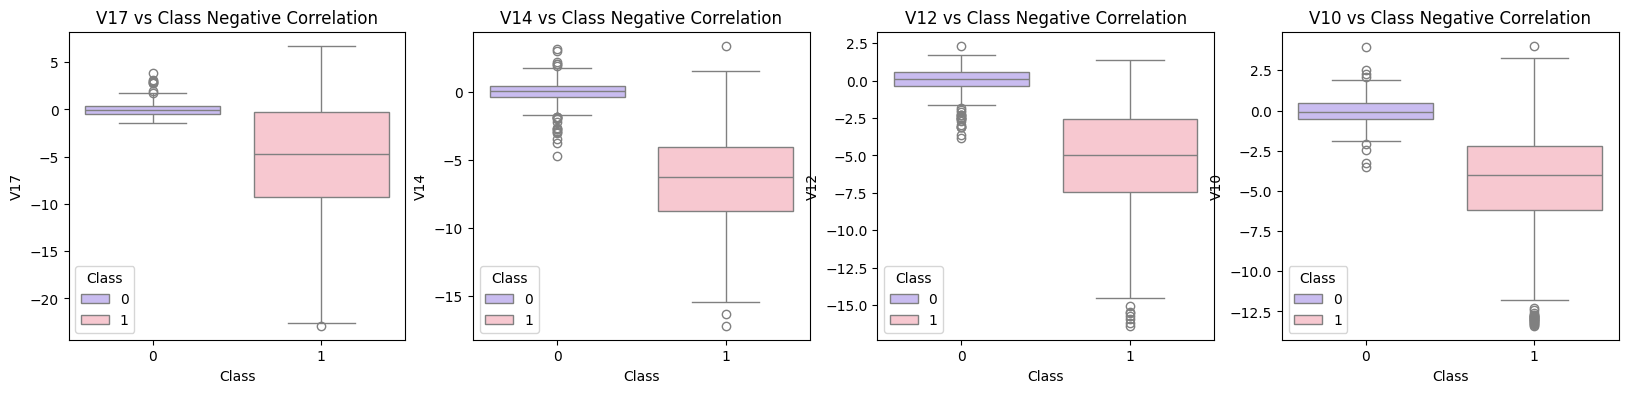

In [25]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

colors = ['#C5B3F9', '#ffc0cb']


# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, ax=axes[0], palette=colors, hue="Class")
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, ax=axes[1], palette=colors, hue="Class")
axes[1].set_title('V14 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_df, ax=axes[2], palette=colors, hue="Class")
axes[2].set_title('V12 vs Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_df, ax=axes[3], palette=colors, hue="Class")
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

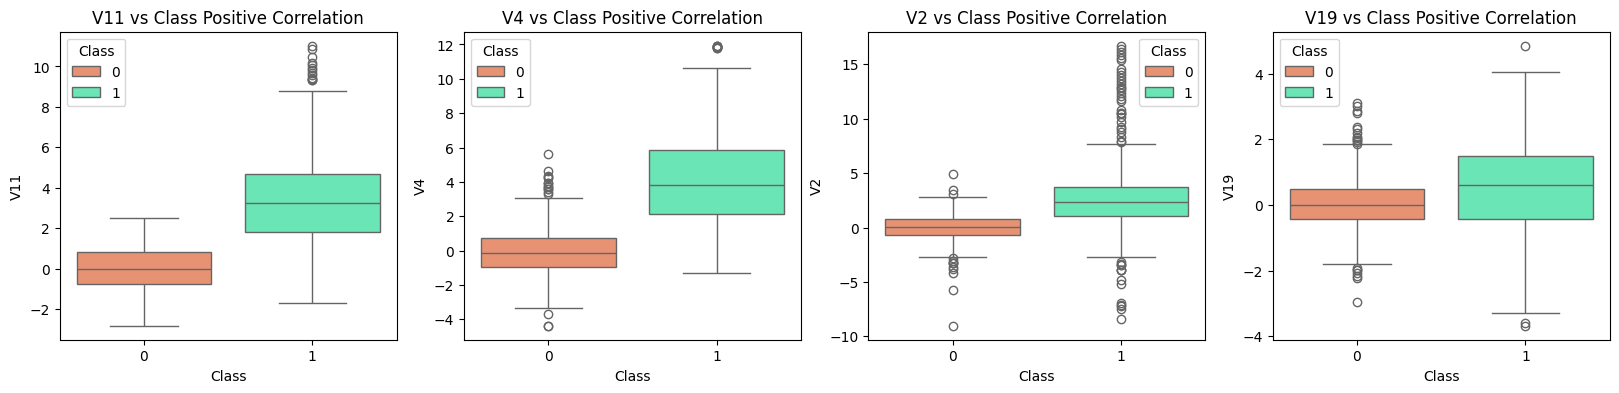

In [26]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

colors = ['#FB8861', '#56F9BB']


# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, ax=axes[0], palette=colors, hue="Class")
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, ax=axes[1], palette=colors, hue="Class")
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_df, ax=axes[2], palette=colors, hue="Class")
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, ax=axes[3], palette=colors, hue="Class")
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

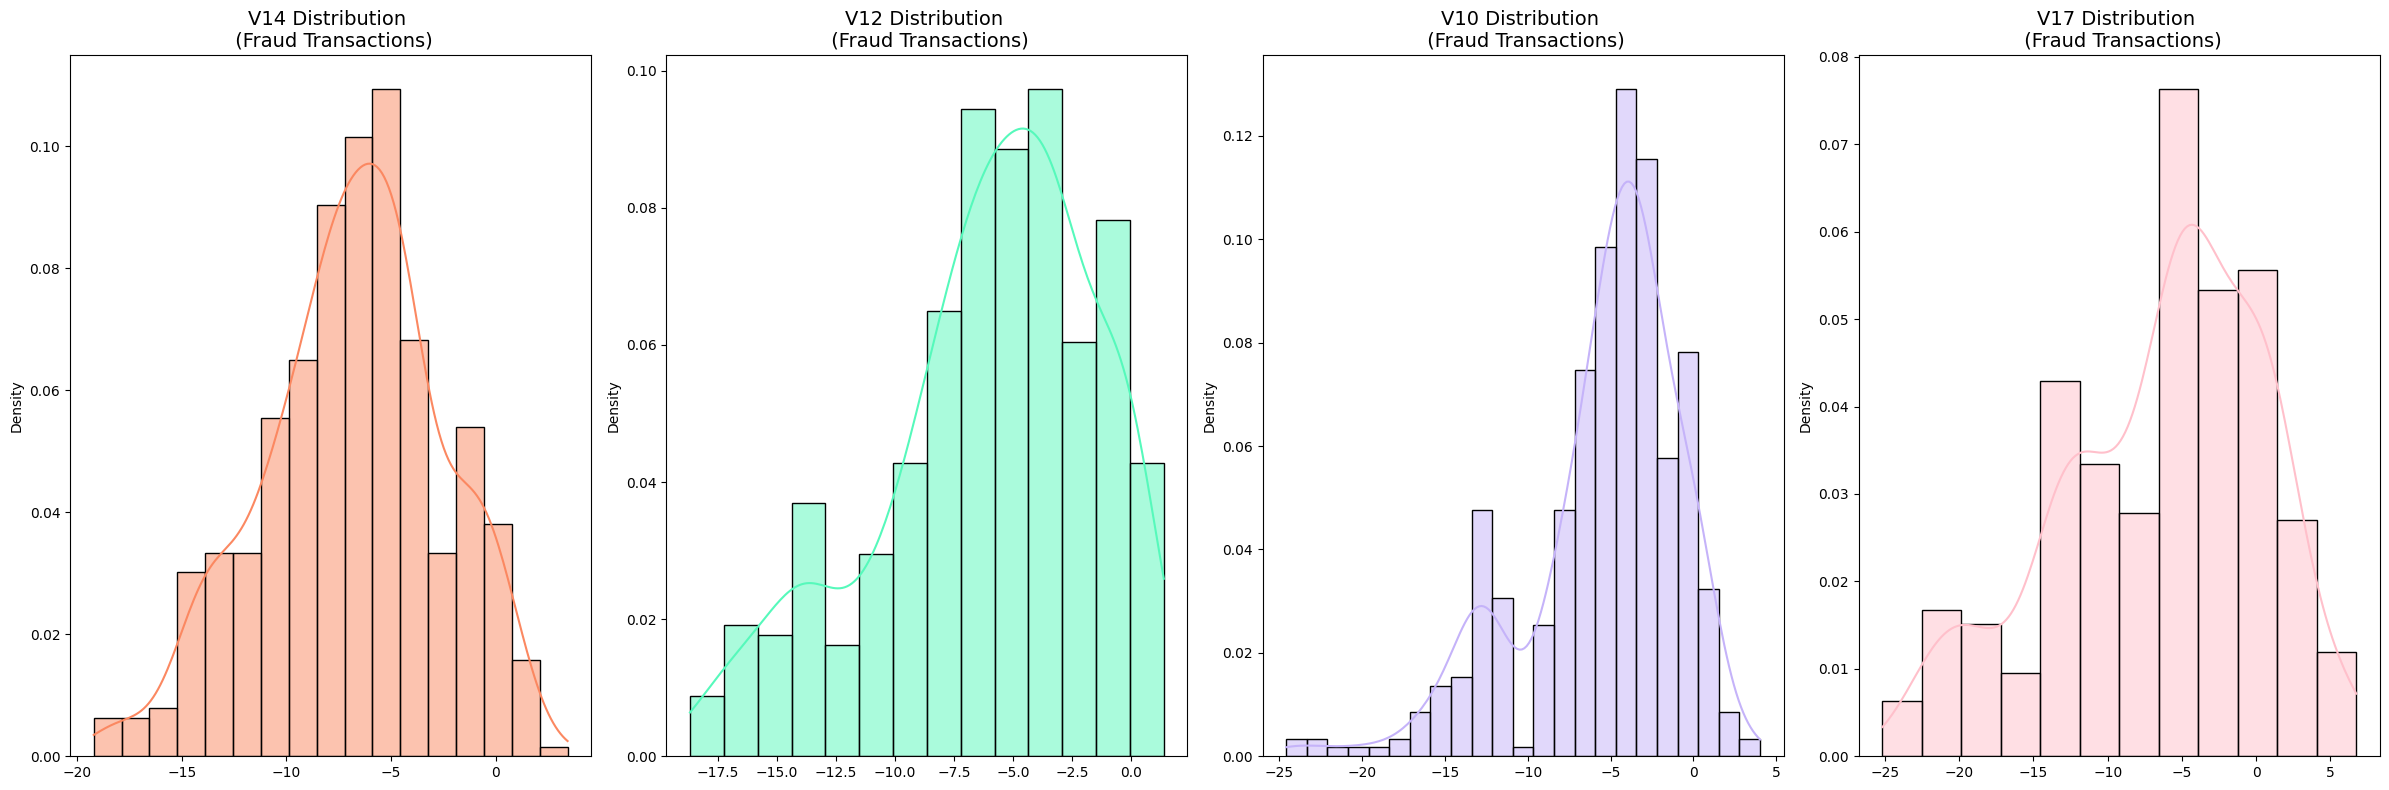

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Создание подграфиков
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 8))

# Данные для мошеннических транзакций
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
v17_fraud_dist = new_df['V17'].loc[new_df['Class'] == 1].values

# График для V14
sns.histplot(v14_fraud_dist, ax=ax1, kde=True, color='#FB8861', stat='density')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

# График для V12
sns.histplot(v12_fraud_dist, ax=ax2, kde=True, color='#56F9BB', stat='density')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

# График для V10
sns.histplot(v10_fraud_dist, ax=ax3, kde=True, color='#C5B3F9', stat='density')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

# График для V17
sns.histplot(v17_fraud_dist, ax=ax4, kde=True, color='#ffc0cb', stat='density')
ax4.set_title('V17 Distribution \n (Fraud Transactions)', fontsize=14)

# Отображение графиков
plt.tight_layout()
plt.show()

In [75]:
import numpy as np

def remove_outliers(v, v_name, coef, new_df):
  print(f'                       {v_name}')
  q25, q75 = np.percentile(v, 25), np.percentile(v, 75)
  print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
  iqr = q75 - q25
  print('iqr: {}'.format(iqr))

  cut_off = iqr * coef
  lower, upper = q25 - cut_off, q75 + cut_off
  print('Cut Off: {}'.format(cut_off))
  print(f'{v_name} Lower: {lower}')
  print(f'{v_name} Upper: {upper}')

  outliers = [x for x in v if x < lower or x > upper]
  print(f'Feature {v_name} Outliers for Fraud Cases: {len(outliers)}')
  # # print('V10 outliers:{}'.format(outliers))
  new_df = new_df.drop(new_df[(new_df[f'{v_name}'] > upper) | (new_df[f'{v_name}'] < lower)].index)
  print('-' * 70)
  return new_df

coef = 1.5

# -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
new_df = remove_outliers(v14_fraud, 'V14', coef, new_df)

# -----> V12 removing outliers from fraud transactions
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
new_df = remove_outliers(v12_fraud, 'V12', coef, new_df)

# -----> V10 removing outliers from fraud transactions
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
new_df = remove_outliers(v10_fraud, 'V10', coef, new_df)

# -----> V17 removing outliers from fraud transactions
v17_fraud = new_df['V17'].loc[new_df['Class'] == 1].values
new_df = remove_outliers(v17_fraud, 'V17', coef, new_df)


                       V14
Quartile 25: -9.50514082568186 | Quartile 75: -4.25246559869278
iqr: 5.25267522698908
Cut Off: 7.87901284048362
V14 Lower: -17.38415366616548
V14 Upper: 3.62654724179084
Feature V14 Outliers for Fraud Cases: 7
----------------------------------------------------------------------
                       V12
Quartile 25: -8.480001462714013 | Quartile 75: -2.81917224983436
iqr: 5.660829212879653
Cut Off: 8.491243819319479
V12 Lower: -16.971245282033493
V12 Upper: 5.672071569485119
Feature V12 Outliers for Fraud Cases: 7
----------------------------------------------------------------------
                       V10
Quartile 25: -6.818151601810775 | Quartile 75: -2.3199303025319997
iqr: 4.498221299278775
Cut Off: 6.747331948918163
V10 Lower: -13.565483550728938
V10 Upper: 4.427401646386163
Feature V10 Outliers for Fraud Cases: 29
----------------------------------------------------------------------
                       V17
Quartile 25: -9.329497450468697 | Qu

In [31]:
# # f,(ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,6))
# f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

# colors = ['#B3F9C5', '#f9c5b3']
# # Boxplots with outliers removed
# # Feature V14
# sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors, hue="Class")
# ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
# ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
#             arrowprops=dict(facecolor='black'),
#             fontsize=14)

# # Feature 12
# sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors, hue="Class")
# ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
# ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
#             arrowprops=dict(facecolor='black'),
#             fontsize=14)

# # Feature V10
# sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors, hue="Class")
# ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
# ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
#             arrowprops=dict(facecolor='black'),
#             fontsize=14)

# # Feature V17
# sns.boxplot(x="Class", y="V17", data=new_df, ax=ax4, palette=colors, hue="Class")
# ax4.set_title("V17 Feature \n Reduction of outliers", fontsize=14)
# # ax4.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
# #             arrowprops=dict(facecolor='black'),
# #             fontsize=14)


# plt.show()

In [76]:
X_new = new_df.drop('Class', axis=1)
y_new = new_df['Class']

In [40]:
# from sklearn.model_selection import train_test_split

# # This is explicitly used for undersampling.
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
# # Turn the values into an array for feeding the classification algorithms.
# X_train = X_train.values
# X_test = X_test.values
# y_train = y_train.values
# y_test = y_test.values
X_train = X_new.values
y_train = y_new.values

In [78]:
# Let's implement simple classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [79]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    # classifier.fit(X_train, y_train)
    # training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    training_score = cross_val_score(classifier, X, y, cv=5, scoring='f1')
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% f1 score")

Classifiers:  LogisticRegression Has a training score of 93.0 % f1 score
Classifiers:  KNeighborsClassifier Has a training score of 92.0 % f1 score
Classifiers:  SVC Has a training score of 92.0 % f1 score
Classifiers:  DecisionTreeClassifier Has a training score of 89.0 % f1 score
